

# Detección de gestos en lenguaje de signos en español

El objetivo de este cuaderno es realizar un primer acercamiento a la detección de los gestos de la lengua de signos española. Para ello se ha seleccionado un conjunto limitado de palabras (Hola,Autobus,Abajo,Coche,Yo,Querer,Mesa,Adios,Agua,Amigo, Casa, Sentir, Colegio,Cerveza,) y se han realizado diferentes vídeos para plasmar sus movimientos. Estos movimientos se capturarán con la ayuda de la biblioteca de Mediapipe.

Mediapipe es una biblioteca de código abierto desarrollada por Google que realiza la detección automática de diferentes partes del cuerpo. Gracias a esta biblioteca, la posición relativa de cada punto en una imagen o un video se puede detectar fácilmente. El objetivo, o más bien la idea principal, es obtener las coordenadas de los diferentes gestos y de estos, poder inferir qué gestos se están realizando.

![Mediapipe](https://google.github.io/mediapipe/images/mobile/holistic_sports_and_gestures_example.gif)

# Extracción de coordenadas de los puntos de referencia

In [2]:
# Importar librerias
import os
import cv2
import pandas as pd
import pickle 
import matplotlib as plt
import numpy as np
import mediapipe as mp
import seaborn as sns
from mediapipe.python.solutions.face_mesh_connections import FACEMESH_CONTOURS
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [3]:
mp_drawing = mp.solutions.drawing_utils 
mp_holistic = mp.solutions.holistic 

# 1. Crear dataset



In [4]:
# Crear Dataframe con los nombres de las columnas
coords = ["x", "y", "z"]
## Lista de nombres de columnas
list_column_names = []
## PALABRA
list_column_names.append("Word")
## MANO DERECHA
count = 0
# Codigo para acceder a los puntos de referencia
for landmark in mp_holistic.HandLandmark:
    for coord in coords:
        list_column_names.append("R"+str(landmark) + "_" + str(count) + "_" + coord)
    count+=1
## MANO IZQUIERDA
count = 0
# Codigo para acceder a los puntos de referencia
for landmark in mp_holistic.HandLandmark:
    for coord in coords:
        list_column_names.append("L"+str(landmark) + "_" + str(count) + "_" + coord)
    count+=1
## CUERPO
count = 0
# Codigo para acceder a los puntos de referencia
for landmark in mp_holistic.PoseLandmark:
    for coord in coords:
        list_column_names.append(str(landmark) + "_" + str(count) + "_" + coord)
    count+=1
    if count == 15:
        break

In [14]:
#CREAR DATAFRAME CON EL RESULTADO
df = pd.DataFrame(columns = [list_column_names])
df

,Word,RHandLandmark.WRIST_0_x,RHandLandmark.WRIST_0_y,RHandLandmark.WRIST_0_z,RHandLandmark.THUMB_CMC_1_x,RHandLandmark.THUMB_CMC_1_y,RHandLandmark.THUMB_CMC_1_z,RHandLandmark.THUMB_MCP_2_x,RHandLandmark.THUMB_MCP_2_y,RHandLandmark.THUMB_MCP_2_z,...,PoseLandmark.LEFT_SHOULDER_11_z,PoseLandmark.RIGHT_SHOULDER_12_x,PoseLandmark.RIGHT_SHOULDER_12_y,PoseLandmark.RIGHT_SHOULDER_12_z,PoseLandmark.LEFT_ELBOW_13_x,PoseLandmark.LEFT_ELBOW_13_y,PoseLandmark.LEFT_ELBOW_13_z,PoseLandmark.RIGHT_ELBOW_14_x,PoseLandmark.RIGHT_ELBOW_14_y,PoseLandmark.RIGHT_ELBOW_14_z


# 2. Extraccion de puntos de referencia de los videos

Los videos se han pasado previamente por el script de data augmentation, para aumentar las diferentes posiciones y combinaciones de los diferentes videos.

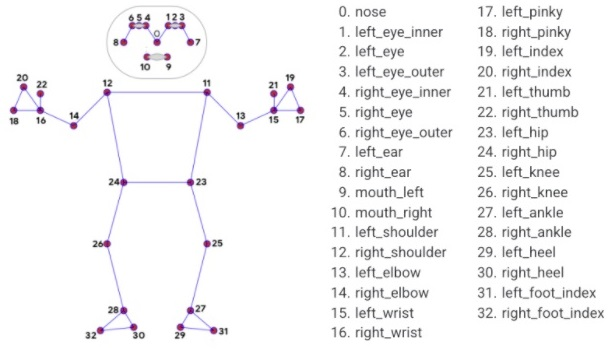


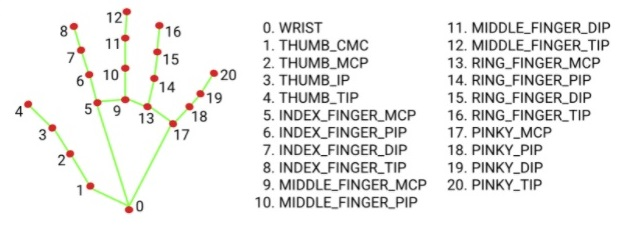

In [8]:
# leer videos
path = "./Train_Dataset/"
words = [words for words in os.listdir(path) if os.path.isdir(os.path.join(path, words))]
# Todos los videos se cambian a  resolucion (600x900), para su mejor deteccion de puntos.
HEIGHT = 600
WIDTH  = 900
for word in words:
    for video in os.listdir(os.path.join(path, word)):
        # Direccion donde se encuentran los videos
        video_path = os.path.join(os.path.join(path, word), video)
        print(video_path)
        # Captura de videos
        cap = cv2.VideoCapture(video_path)
        # Inizializar modelo holistico
        with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
            while cap.isOpened():
                # Leer sequencia
                ret, frame = cap.read()
                if ret == True:
                    # Redimensionar sequencia
                    frame = cv2.resize(frame, (WIDTH, HEIGHT), interpolation = cv2.INTER_AREA)
                    # Cambiar  color de BGR a RGB
                    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                    frame.flags.writeable = False
                    # Deteccion puntos de referencia
                    results = holistic.process(frame)
                    try:
                        # Añadir coordenadas a la lista
                        row = []
                        # El nombre de las palabras es añadida a la lista
                        row.append(word)
                        ## Detectar puntos mano derecha ( rhand)
                        for landmark in results.right_hand_landmarks.landmark:
                            row.append(landmark.x)
                            row.append(landmark.y)
                            row.append(landmark.z)
                        ## Detectar puntos mano iquierda ( lhand)
                        for landmark in results.left_hand_landmarks.landmark:
                            row.append(landmark.x)
                            row.append(landmark.y)
                            row.append(landmark.z)
                        ## Detectar puntos cuerpo ( pose)
                        count = 0
                        for landmark in results.pose_landmarks.landmark:
                            row.append(landmark.x)
                            row.append(landmark.y)
                            row.append(landmark.z)
                            count += 1
                            if count == 15:
                                break
                        df.loc[len(df)] = row
                    except:
                        pass
                else:
                    break
            cap.release()

./Train_Dataset/Querer\querer-f-r10-rs10.avi
./Train_Dataset/Querer\querer-f-r10-rs13.avi
./Train_Dataset/Querer\querer-f-r10-t25-rs10.avi
./Train_Dataset/Querer\querer-f-r10-t25-rs13.avi
./Train_Dataset/Querer\querer-f-r10-t25.avi
./Train_Dataset/Querer\querer-f-r10-t30-rs10.avi
./Train_Dataset/Querer\querer-f-r10-t30-rs13.avi
./Train_Dataset/Querer\querer-f-r10-t30.avi
./Train_Dataset/Querer\querer-f-r10.avi
./Train_Dataset/Querer\querer-f-r13-rs10.avi
./Train_Dataset/Querer\querer-f-r13-rs13.avi
./Train_Dataset/Querer\querer-f-r13-t25-rs10.avi
./Train_Dataset/Querer\querer-f-r13-t25-rs13.avi
./Train_Dataset/Querer\querer-f-r13-t25.avi
./Train_Dataset/Querer\querer-f-r13-t30-rs10.avi
./Train_Dataset/Querer\querer-f-r13-t30-rs13.avi
./Train_Dataset/Querer\querer-f-r13-t30.avi
./Train_Dataset/Querer\querer-f-r13.avi
./Train_Dataset/Querer\querer-f-rs10.avi
./Train_Dataset/Querer\querer-f-rs13.avi
./Train_Dataset/Querer\querer-f-t25-rs10.avi
./Train_Dataset/Querer\querer-f-t25-rs13.avi


In [9]:
#Comprobar dataframe 
df

,Word,RHandLandmark.WRIST_0_x,RHandLandmark.WRIST_0_y,RHandLandmark.WRIST_0_z,RHandLandmark.THUMB_CMC_1_x,RHandLandmark.THUMB_CMC_1_y,RHandLandmark.THUMB_CMC_1_z,RHandLandmark.THUMB_MCP_2_x,RHandLandmark.THUMB_MCP_2_y,RHandLandmark.THUMB_MCP_2_z,...,PoseLandmark.LEFT_SHOULDER_11_z,PoseLandmark.RIGHT_SHOULDER_12_x,PoseLandmark.RIGHT_SHOULDER_12_y,PoseLandmark.RIGHT_SHOULDER_12_z,PoseLandmark.LEFT_ELBOW_13_x,PoseLandmark.LEFT_ELBOW_13_y,PoseLandmark.LEFT_ELBOW_13_z,PoseLandmark.RIGHT_ELBOW_14_x,PoseLandmark.RIGHT_ELBOW_14_y,PoseLandmark.RIGHT_ELBOW_14_z
0,Abajo,0.440598,0.783921,-2.366612e-07,0.456324,0.744731,-0.019115,0.488569,0.721949,-0.028583,...,-0.076862,0.278362,0.462741,-0.162137,0.791987,0.570950,-0.406257,0.230211,0.762704,-0.394085
1,Abajo,0.438445,0.783089,-2.491245e-07,0.456896,0.744480,-0.016129,0.490010,0.721718,-0.023793,...,-0.011478,0.278908,0.463437,-0.152372,0.791986,0.570950,-0.292670,0.230245,0.762779,-0.377853
2,Abajo,0.443570,0.780087,-1.923205e-07,0.462270,0.742764,-0.015684,0.493633,0.721211,-0.023362,...,0.079940,0.279700,0.464741,-0.169411,0.788502,0.558375,-0.187706,0.230808,0.763529,-0.428225
3,Abajo,0.448515,0.780262,-2.180878e-07,0.463991,0.741014,-0.016938,0.495846,0.720119,-0.025368,...,0.115322,0.279688,0.467163,-0.177098,0.784908,0.549394,-0.169941,0.231852,0.764947,-0.451566
4,Abajo,0.446438,0.780774,-2.177188e-07,0.463033,0.740608,-0.016879,0.496571,0.719811,-0.024843,...,0.124477,0.279688,0.468285,-0.182670,0.782062,0.545701,-0.154944,0.232256,0.766068,-0.462583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145113,Yo,0.312952,0.610633,5.178737e-08,0.334377,0.573368,0.006837,0.360577,0.566903,0.009918,...,-0.074231,0.292407,0.558307,-0.001660,0.604934,0.802779,-0.180878,0.202029,0.797647,-0.304067
145114,Yo,0.319013,0.607557,8.274507e-08,0.341709,0.572465,0.006189,0.368763,0.568879,0.008412,...,-0.078380,0.292414,0.558215,-0.003627,0.605232,0.802593,-0.181548,0.201443,0.797563,-0.300188
145115,Yo,0.322016,0.604546,5.353968e-08,0.343282,0.570730,0.008223,0.369525,0.567853,0.011697,...,-0.078485,0.292222,0.557787,0.001754,0.605218,0.802439,-0.180362,0.200644,0.797508,-0.286351
145116,Yo,0.325406,0.602502,3.627243e-08,0.347352,0.570932,0.009141,0.373304,0.569278,0.012340,...,-0.079909,0.291940,0.557826,0.001894,0.604663,0.802659,-0.180750,0.200590,0.797946,-0.287605


In [10]:
# GRABAR DATAFRAME EN ARCHIVO CSV
df.to_csv("data6complet.csv", index= False)